In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# load the dataset

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, usecols=[1], engine='python')
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [3]:
dataset = df.values
dataset[1:10]

array([[118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]], dtype=int64)

In [4]:
dataset = dataset.astype('float32')
dataset[0:9]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.]], dtype=float32)

# split into train and test sets

In [5]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test =dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


# convert an array of values into a dataset matrix

In [6]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1

In [7]:
look_back =1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
trainX[0:3], testX[0:3]

(array([[112.],
        [118.],
        [132.]], dtype=float32),
 array([[315.],
        [301.],
        [356.]], dtype=float32))

In [9]:
print(len(trainX), len(trainY), len(testX), len(testY))

94 94 46 46


# create and fit Multilayer Perceptron model

In [10]:
model = Sequential()
model.add(Dense(50, input_dim=look_back, activation='relu'))
model.add(Dense(100, input_dim=look_back, activation='relu'))
model.add(Dense(1000, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 7353.6637
Epoch 2/200
 - 0s - loss: 664.2532
Epoch 3/200
 - 0s - loss: 730.4932
Epoch 4/200
 - 0s - loss: 701.0425
Epoch 5/200
 - 0s - loss: 735.8475
Epoch 6/200
 - 0s - loss: 630.7382
Epoch 7/200
 - 0s - loss: 604.7951
Epoch 8/200
 - 0s - loss: 594.1495
Epoch 9/200
 - 0s - loss: 614.1363
Epoch 10/200
 - 0s - loss: 992.4676
Epoch 11/200
 - 0s - loss: 804.2504
Epoch 12/200
 - 0s - loss: 760.3817
Epoch 13/200
 - 0s - loss: 687.2097
Epoch 14/200
 - 0s - loss: 633.2304
Epoch 15/200
 - 0s - loss: 674.4112
Epoch 16/200
 - 0s - loss: 620.9025
Epoch 17/200
 - 0s - loss: 753.1785
Epoch 18/200
 - 0s - loss: 661.3459
Epoch 19/200
 - 0s - loss: 608.5937
Epoch 20/200
 - 0s - loss: 714.9261
Epoch 21/200
 - 0s - loss: 648.0907
Epoch 22/200
 - 0s - loss: 600.0373
Epoch 23/200
 - 0s - loss: 720.7800
Epoch 24/200
 - 0s - loss: 702.3839
Epoch 25/200
 - 0s - loss: 636.5389
Epoch 26/200
 - 0s - loss: 643.8432
Epoch 27/200
 - 0s - loss: 601.5590
Epoch 28/200
 - 0s - loss: 704.6763


In [11]:
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %2f MSE (%.2f RMSE)' %(testScore, math.sqrt(testScore)))

Train Score: 646.38 MSE (25.42 RMSE)
Test Score: 3007.778034 MSE (54.84 RMSE)


# generate predictions for training

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
trainPredict[0:10]

array([[111.09706 ],
       [116.578674],
       [129.36916 ],
       [126.62834 ],
       [119.3195  ],
       [132.10999 ],
       [143.98688 ],
       [143.98688 ],
       [133.02359 ],
       [117.49228 ]], dtype=float32)

# shift train predictions for plotting

In [14]:
trainPretictPlot = np.empty_like(dataset)
trainPretictPlot[0:10]

array([[0.0000000e+00],
       [0.0000000e+00],
       [4.4841551e-44],
       [0.0000000e+00],
       [1.0883164e+33],
       [0.0000000e+00],
       [1.4012985e-44],
       [0.0000000e+00],
       [1.5414283e-44],
       [0.0000000e+00]], dtype=float32)

In [15]:
trainPretictPlot[:,:] = np.nan
trainPretictPlot[0:3]

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [16]:
trainPretictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict
trainPretictPlot

array([[       nan],
       [111.09706 ],
       [116.578674],
       [129.36916 ],
       [126.62834 ],
       [119.3195  ],
       [132.10999 ],
       [143.98688 ],
       [143.98688 ],
       [133.02359 ],
       [117.49228 ],
       [103.78819 ],
       [116.578674],
       [113.83786 ],
       [123.88751 ],
       [137.59163 ],
       [132.10999 ],
       [122.97392 ],
       [144.90048 ],
       [164.08624 ],
       [164.08624 ],
       [153.12296 ],
       [130.28278 ],
       [112.924255],
       [136.67801 ],
       [141.24605 ],
       [145.81409 ],
       [171.39511 ],
       [157.69098 ],
       [165.91345 ],
       [171.39511 ],
       [190.58087 ],
       [190.58087 ],
       [176.87677 ],
       [156.77737 ],
       [142.15967 ],
       [160.43181 ],
       [164.99985 ],
       [173.22232 ],
       [185.09924 ],
       [174.13593 ],
       [175.96313 ],
       [207.93945 ],
       [218.9028  ],
       [229.86613 ],
       [199.71698 ],
       [183.27202 ],
       [165.9

# Shift test predicts for plotting

In [17]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[0:4]

array([[-6.1407093e-09],
       [ 7.3708299e-43],
       [-2.2023303e-18],
       [ 7.3708299e-43]], dtype=float32)

In [18]:
testPredictPlot[:, :] = np.nan

In [19]:
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


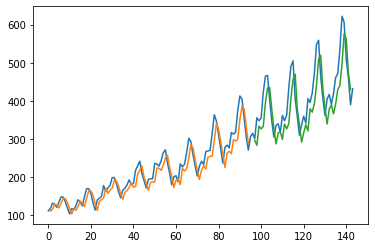

In [20]:
plt.plot(dataset)
plt.plot(trainPretictPlot)
plt.plot(testPredictPlot)
plt.show()